In [1]:
### IMPORTING THE PYTHON LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# let's Import the Dataset

In [4]:
df=pd.read_csv("train_LZdllcl.csv")
pd.set_option('display.max_columns',None)

In [5]:
# here df is our training set
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
df.shape

(54808, 14)

In [7]:
# there are  54808 rows and 14 features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [9]:
df.isna().sum()*100/len(df)

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [10]:
# Here information tell us that there is some null values we have to handle.

In [11]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [12]:
# It can be seen that there are 5 features, which are of 'object'data types.
#So we have to handle categorical columns for our model creation

In [13]:
## summarizing the stats of the data
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [14]:
df.describe(include='O')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [15]:
## from the information we can see the unique values of each features

In [16]:
### EXPLORATORY DATA ANALYSIS

<AxesSubplot:>

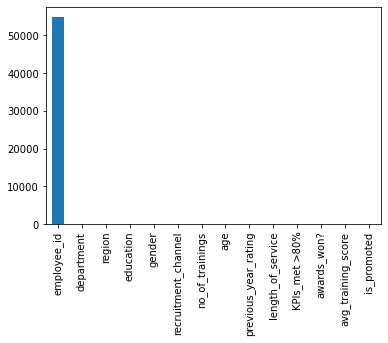

In [17]:
df.nunique().plot(kind='bar')

In [18]:
# employee id is unique
df.drop('employee_id',axis=1,inplace=True)

In [19]:
### getting numerical features
num_feature=[features for features in df.columns if df[features].dtypes!='O' ]

In [20]:
num_feature

['no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

In [21]:
# getting categorical features
cat_features=[features for features in df.columns if df[features].dtypes =='O']

In [22]:
cat_features

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [23]:
num_data=df[num_feature]
## checking the unique values in numerical features
for i in num_data.columns:
    print(len(num_data[i].unique()),num_data.value_counts(i))
    print("________________________________________")

10 no_of_trainings
1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
8         5
9         5
10        5
dtype: int64
________________________________________
41 age
30    3665
31    3534
32    3534
29    3405
33    3210
28    3147
34    3076
27    2827
35    2711
36    2517
37    2165
26    2060
38    1923
39    1695
40    1663
25    1299
41    1289
42    1149
43     992
44     847
24     845
45     760
46     697
47     557
48     557
50     521
49     441
23     428
51     389
53     364
52     351
54     313
55     294
56     264
57     238
22     231
60     217
58     213
59     209
20     113
21      98
dtype: int64
________________________________________
6 previous_year_rating
3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
dtype: int64
________________________________________
35 length_of_service
3     7033
4     6836
2     6684
5     5832
7     5551
6     4734
1     4547
8     2883
9     2629
10    2193
11     916
12     794


array([[<AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'previous_year_rating'}>],
       [<AxesSubplot:title={'center':'length_of_service'}>,
        <AxesSubplot:title={'center':'KPIs_met >80%'}>,
        <AxesSubplot:title={'center':'awards_won?'}>],
       [<AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>, <AxesSubplot:>]],
      dtype=object)

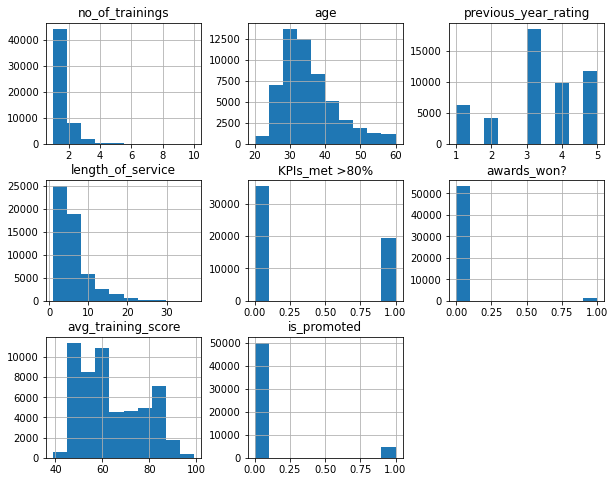

In [24]:
num_data.hist(figsize=(10,8))

In [25]:
# all are descrete variables and all the ratings lies between 1 to 4.
# lets check the minimum and maximum of the all numerical values

In [26]:
for i in num_data.columns:
    print(f"{i} : minimum: {num_data[i].min()}, maximum: {num_data[i].max()}")
    print("..............................")

no_of_trainings : minimum: 1, maximum: 10
..............................
age : minimum: 20, maximum: 60
..............................
previous_year_rating : minimum: 1.0, maximum: 5.0
..............................
length_of_service : minimum: 1, maximum: 37
..............................
KPIs_met >80% : minimum: 0, maximum: 1
..............................
awards_won? : minimum: 0, maximum: 1
..............................
avg_training_score : minimum: 39, maximum: 99
..............................
is_promoted : minimum: 0, maximum: 1
..............................


From the information we can see the maximum and minimum values of each numerical features. the age group is between 20 and 60. length of service is maximum 37 years. and avarage training score lies between 39 to 99.

In [27]:
df[cat_features].columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

<AxesSubplot:>

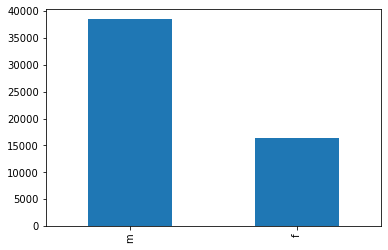

In [28]:
df.gender.value_counts().plot(kind='bar')

This graph revealing that number of male employees is much higher than that of females, almost twice.

Region of employment high in region 2 and low in region 18.

<AxesSubplot:title={'center':'Graph of department'}>

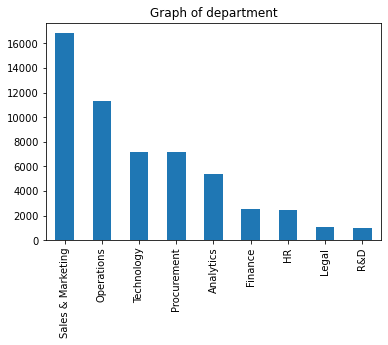

In [29]:
df.department.value_counts().plot(kind='bar',title='Graph of department')

The graphs tells that the company has more number of employees in sales&marketing department followed by operations and technology. 9 number of departments are there.

<AxesSubplot:title={'center':'Graph of education'}>

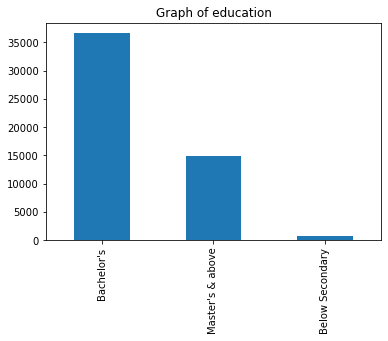

In [30]:
df.education.value_counts().plot(kind='bar',title='Graph of education')

Education level of more employees are Bachelor's Degree

<AxesSubplot:title={'center':'Graph of recruitment_channel'}>

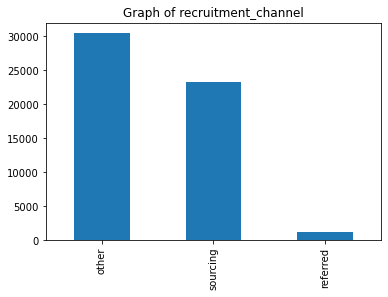

In [31]:
df.recruitment_channel.value_counts().plot(kind='bar',title='Graph of recruitment_channel')

There are 3 types of recruitment channel: others,sourcing and reffered.Higher number of employees recruted through other recruting channel.

In [32]:
df.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


Text(0.5, 1.0, 'Numbers of promoted vs not promoted')

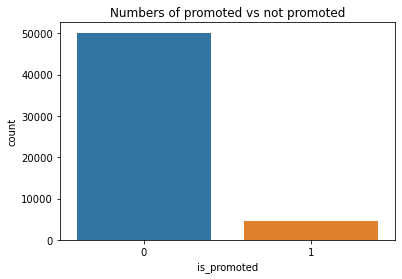

In [33]:
# our target column is 'is_promoted',let's plot a graph of it.
sns.countplot(data=df,x='is_promoted')
plt.title("Numbers of promoted vs not promoted")

Data of promotion says that it has more number of 'no' values and low number of 'yes' values
It can be seen that there is large number of difference in employees who promoted and not prometed,there is 450000 range of diffrence. so we can say it is an imbalanced data.

In [34]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

Text(0.5, 1.0, 'Impact of department on promotion')

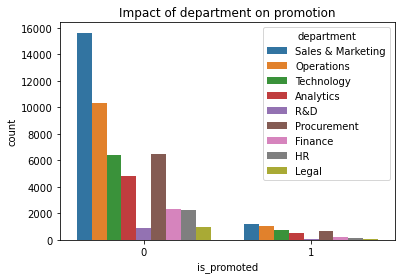

In [35]:
# analysis on categorical columns with respect to target column.
#impact of department on promotion
sns.countplot(data=df,x="is_promoted",hue="department")
plt.title('Impact of department on promotion')

Sales&marketing and operations have more number of promotion. as well as more count of employees are in the same departments.

Text(0.5, 1.0, 'Impact of education on promotion')

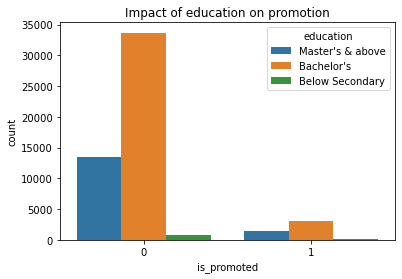

In [36]:
# impact of education field on promotion
sns.countplot(data=df,x="is_promoted",hue="education")
plt.title('Impact of education on promotion')

First thing is employees who having bachelors degree are more as compared to others and followed by masters degree.
second one is nearly 3000 employees with bachelors degree background get promoted.
like the number of employees with below secondary level of education is less also less in getting promotion.

Text(0.5, 1.0, 'Impact of gender on promotion')

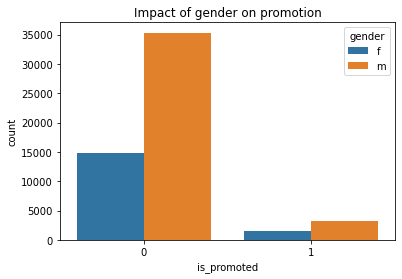

In [37]:
# impact of gender on promotion
sns.countplot(data=df,x="is_promoted",hue="gender")
plt.title('Impact of gender on promotion')

Male employees are more as compared to females, males are more likely to get promoted than females

Text(0.5, 1.0, 'Impact of region on promotion')

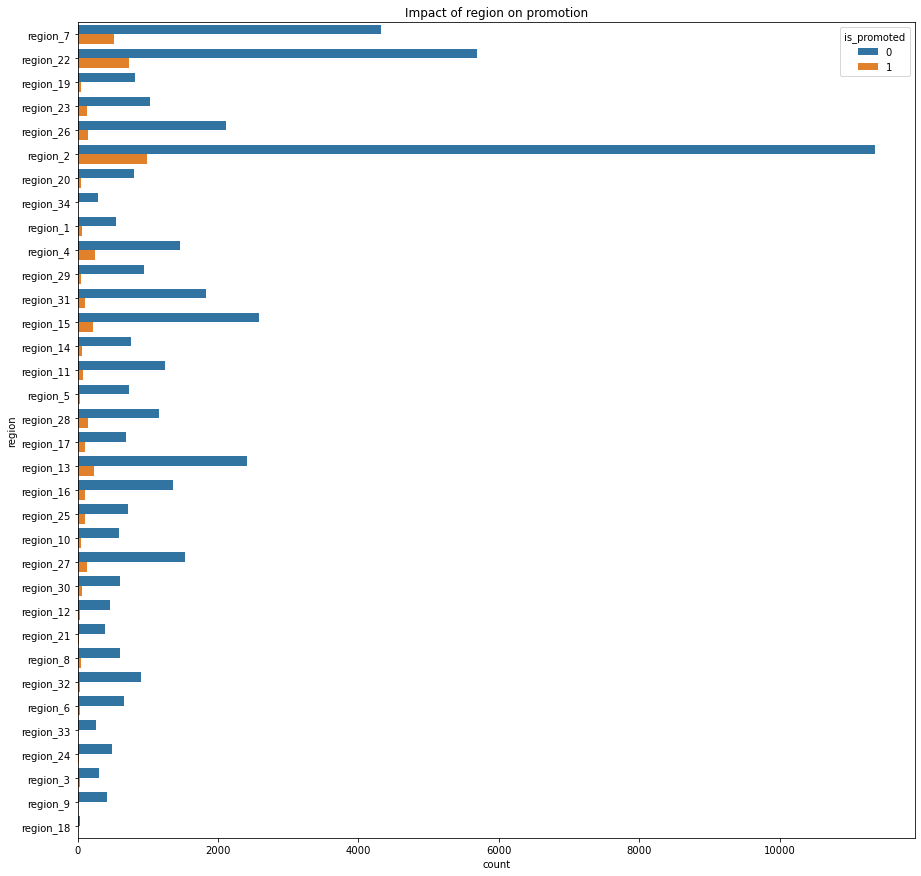

In [38]:
# impact of region on promotion
plt.figure(figsize=(15,15))
sns.countplot(data=df,hue="is_promoted",y="region")
plt.title('Impact of region on promotion')

region 2 has the highest number of employees who got promotion.Region of employment high in region 2 and low in region 18.

Text(0.5, 1.0, 'Impact of recruitment channel on promotion')

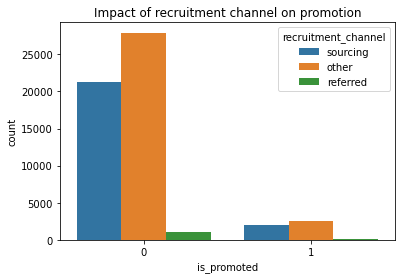

In [39]:
# impact of recruitment_channel on promotion
sns.countplot(data=df,x="is_promoted",hue="recruitment_channel")
plt.title('Impact of recruitment channel on promotion')

Text(0.5, 1.0, 'Impact of age on education')

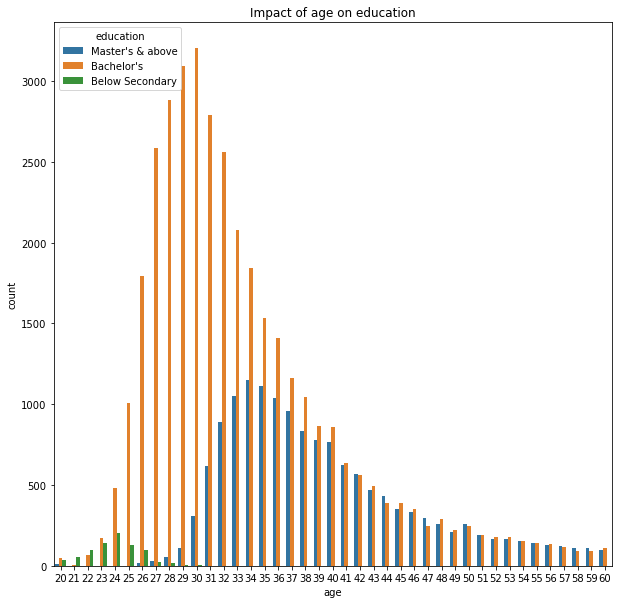

In [40]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x="age",hue="education")
plt.title('Impact of age on education')

Here we can infer that the education level of older people are either bachelor's degree or master's and above and majority of employees who are 25 to 40 years having bachelor's degree. Below 25 years having either bachelors degree or below secondary level.

In [41]:
num_data.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [42]:
# analysis on numerical columns with respect to target column.

Text(0.5, 1.0, 'Impact of age on promotion')

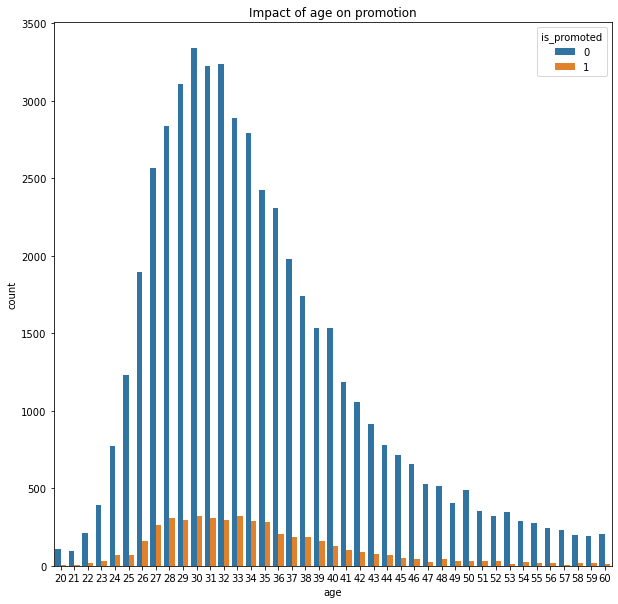

In [43]:
# impact of age on promotion
plt.figure(figsize=(10,10))
sns.countplot(data=df,hue="is_promoted",x="age")
plt.title('Impact of age on promotion')

the information that age group of 25 to 40 are higher in number as well as more number of these age group are in promotion list.

Text(0.5, 1.0, 'Impact of length_of_service on promotion')

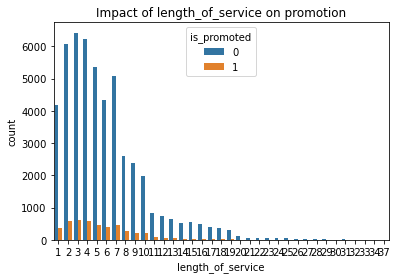

In [44]:
# impact of length of service on promotion
sns.countplot(data=df,hue="is_promoted",x="length_of_service")
plt.title('Impact of length_of_service on promotion')

Employees who ranges from 1 to 10 years of working expirience are more in count and like age they are also higher in promotion list too.

Text(0.5, 1.0, 'Impact of no_of_trainings on promotion')

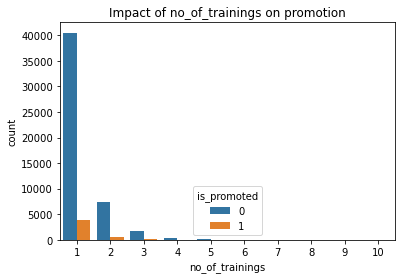

In [45]:
# impact of no_of_trainings on promotion
sns.countplot(data=df,hue="is_promoted",x="no_of_trainings")
plt.title('Impact of no_of_trainings on promotion')

The number of employees who got rating one is large in number compared to others.

In [46]:
num_data.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [47]:
df.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


Text(0.5, 1.0, 'Impact of previous year rating on promotion')

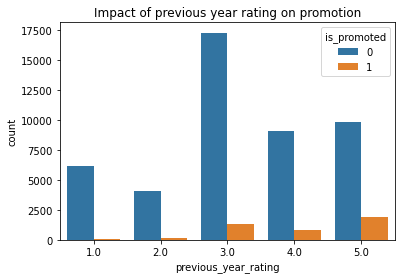

In [48]:
sns.countplot(data=df,hue='is_promoted',x='previous_year_rating')
plt.title('Impact of previous year rating on promotion')

Graph tells us that the number of 3 rated employes are more as compared to other rating but number of employees who are eligible for rating of 5 points more in promotion list followed by the employees who get 3 and 4 points in rating

Text(0.5, 1.0, 'Impact of Avarage training score on promotion')

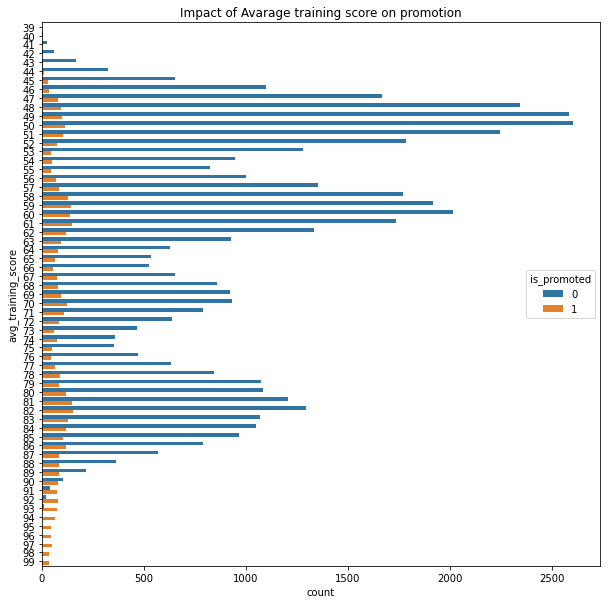

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,y='avg_training_score',hue='is_promoted')
plt.title('Impact of Avarage training score on promotion')

This informs that a large group of employees got a score between 45 to 50 and this group of employees are more likely to get promoted. but here a noted point that, each employees who scored more or equal to 90 marks surely got promoted.

Text(0.5, 1.0, 'Impact kpimet on promotion')

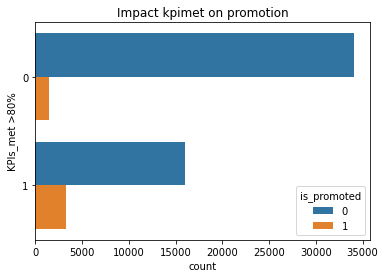

In [50]:
sns.countplot(data=df,y='KPIs_met >80%',hue='is_promoted')
plt.title('Impact kpimet on promotion')

More number of employees having key performance index less than 80% than more than 80%. but the number of employees higher in promotion list who got more than 80% of key performance index.

Text(0.5, 1.0, 'Impact of awards on promotion')

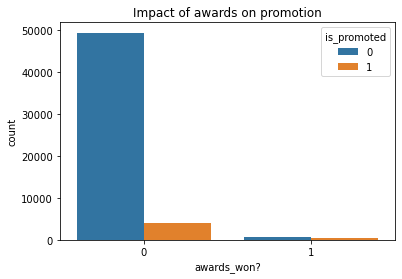

In [51]:
sns.countplot(data=df,x='awards_won?',hue='is_promoted')
plt.title('Impact of awards on promotion')

Award winning employees have high chance to get promoted but they are very less in numbers.

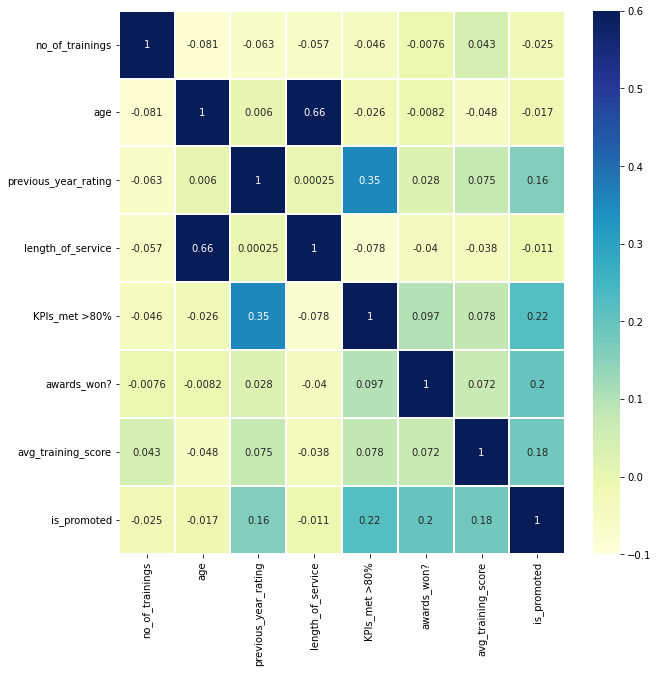

In [52]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,vmin=-0.1,vmax=0.6,annot=True,linewidths=0.2,cmap='YlGnBu')
plt.show()

Here lenth of service and age are highly correlated.

<AxesSubplot:>

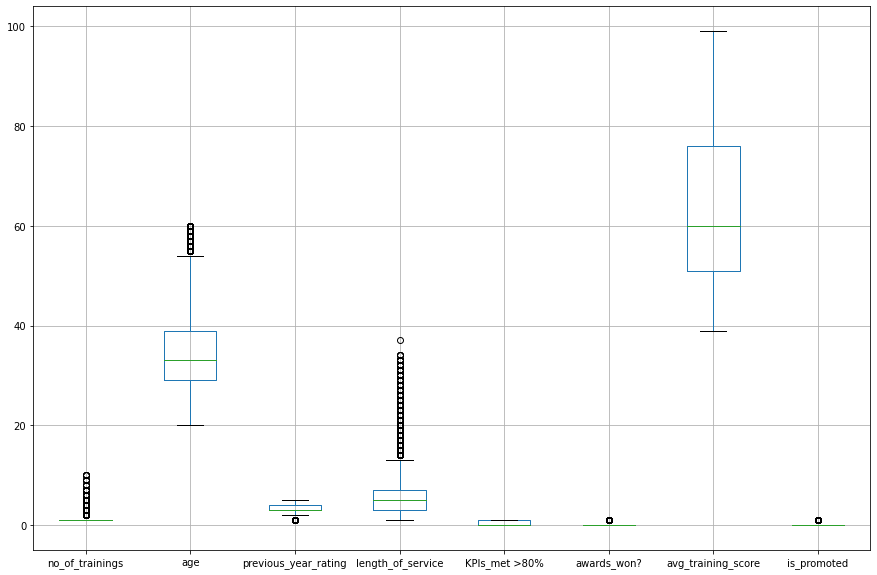

In [53]:
#checking outliers
num_data.boxplot(figsize=(15,10))

From the graph we have conclude that features no.of rating,age,length of service having some outliers

In [54]:
df.age.max()

60

Maximum age is 60,  the outliers seems to be relevant and will not be removing any outliers.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_trainings'>

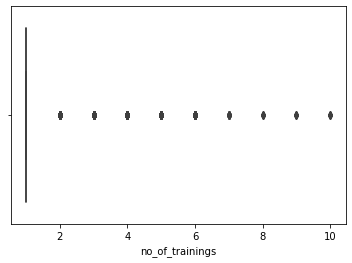

In [55]:
#checking the outliers present in the column no.traiings.
sns.boxplot(df['no_of_trainings'])

In [56]:
## rating is between 1 to 10 so it is valid.
## let's check outliers of length of services

In [61]:
Q1=np.percentile(df['length_of_service'],30,interpolation='midpoint')
Q2=np.percentile(df['length_of_service'],60,interpolation='midpoint')
Q3=np.percentile(df['length_of_service'],95,interpolation='midpoint')
IQR=Q3-Q1
lw=Q1-1.5*IQR
up=Q3+1.5*IQR
print(lw,up)

-15.0 33.0


In [62]:
outliers=[]
for x in df['length_of_service']:
    if((x>up)|(x<lw)):
        outliers.append(x)

In [63]:
outliers

[34, 34, 34, 34, 37]

In [64]:
ind=df['length_of_service']>up
dt=df.loc[ind].index
df.drop(dt,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='length_of_service'>

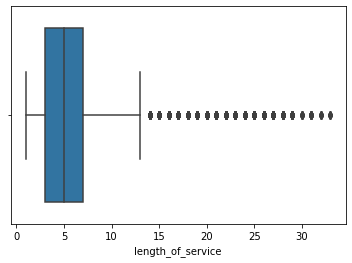

In [65]:
sns.boxplot(df['length_of_service'])

we have removed the outliers

In [66]:
## filling the missing values
df.isna().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [67]:
## handiling the null values of education, we have seen that education level of employees are either masters or bachelors or below secondary so we choosing randomly.

In [68]:
df['education']=df['education'].fillna("Bachelor's")

In [69]:
#handling previous year rating
df['previous_year_rating']=df['previous_year_rating'].fillna(df['previous_year_rating'].median())

<AxesSubplot:>

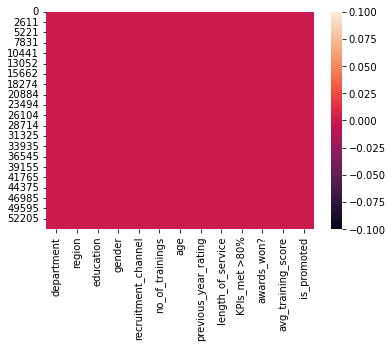

In [70]:
sns.heatmap(df.isna())

In [ ]:
# successfully handled all the null values.

In [71]:
### spilitting the dataset
X=df.drop('is_promoted',axis=1)

In [72]:
X.shape

(54803, 12)

In [73]:
# label encoding
from sklearn.preprocessing import LabelEncoder
labelen=LabelEncoder()
a=['department', 'region', 'education', 'gender',
       'recruitment_channel',]
for i in np.arange(len(a)):
    X[a[i]]=labelen.fit_transform(X[a[i]])

In [74]:
# Standardisation


from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X = std.fit_transform(X)

In [75]:
Y=df['is_promoted']

In [76]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [77]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print("unbalanced data :",Counter(Y))
X_sm,Y_sm=sm.fit_resample(X,Y)
print("balanced data :",Counter(Y_sm))

unbalanced data : Counter({0: 50136, 1: 4667})
balanced data : Counter({0: 50136, 1: 50136})


In [78]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_sm,Y_sm,test_size=.2,random_state=45)

In [79]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train,Y_train)
y_pred = logit.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.7214161057092994
precision score: 0.7213967632632219
recall_score: 0.72141360903792
f1 score: 0.7214005203260403


In [81]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,Y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

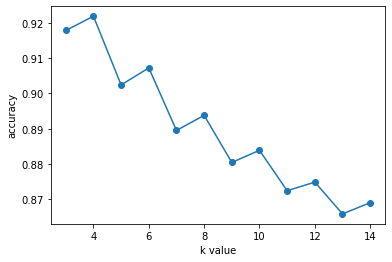

In [82]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [83]:
classifier=KNeighborsClassifier(n_neighbors=8,metric='minkowski')
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)

In [84]:
print("accuracy is:",accuracy_score(Y_test,y_pred))
print("precision score:",precision_score(Y_test,y_pred,average='macro'))
print("recall_score:",recall_score(Y_test,y_pred,average='macro'))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

accuracy is: 0.893792071802543
precision score: 0.9055631333909124
recall_score: 0.8946550487993633
f1 score: 0.893156325106335


In [85]:
# DECSION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,Y_train)
y_pred=dt_model.predict(X_test)
print("accuracy is:",accuracy_score(Y_test,y_pred))
confusion_matrix(Y_test,y_pred)

accuracy is: 0.9330840189478933


array([[9382,  746],
       [ 596, 9331]], dtype=int64)

In [86]:
print("precision score:",precision_score(Y_test,y_pred,average='macro'))

precision score: 0.9331193108315519


In [87]:
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))

f1 score: 0.9330835862072586


### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)
print("accuracy is:",accuracy_score(Y_test,y_pred))
print('f1 score:',f1_score(Y_test,y_pred,average='macro'))
confusion_matrix(Y_test,y_pred)

accuracy is: 0.9664422837197706
f1 score: 0.9664356473410889


array([[9832,  296],
       [ 377, 9550]], dtype=int64)

In [137]:
data=pd.read_csv("test_2umaH9m.csv")
# here the data is our test data

In [140]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [141]:
data.shape

(23490, 13)

In [142]:
data.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

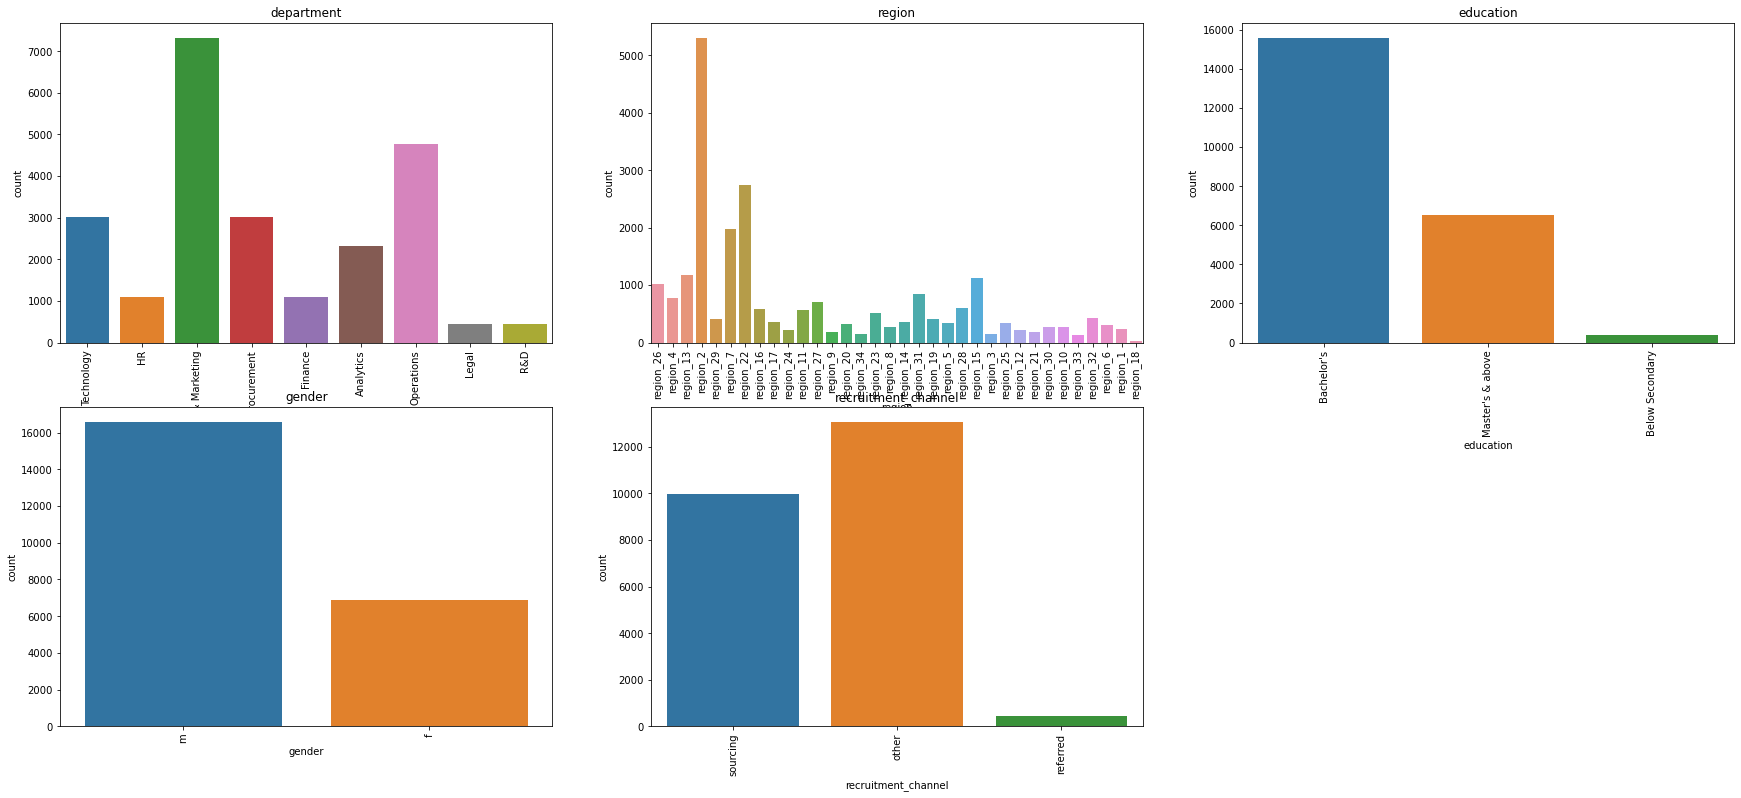

In [143]:
col = ['department', 'region', 'education', 'gender',
       'recruitment_channel']
plt.figure(figsize=(30,20))
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    sns.countplot(data=data,x=data[col[i]])
    plt.title(col[i])
    plt.xticks(rotation=90)
plt.show()    

Most of the employees working under Sales&Marketing department followed by operations.Most of the employees holding Bachelor's degree where as less than 50% of employees having masters and above education classification.Male employees are more than female employees. same as the trained data

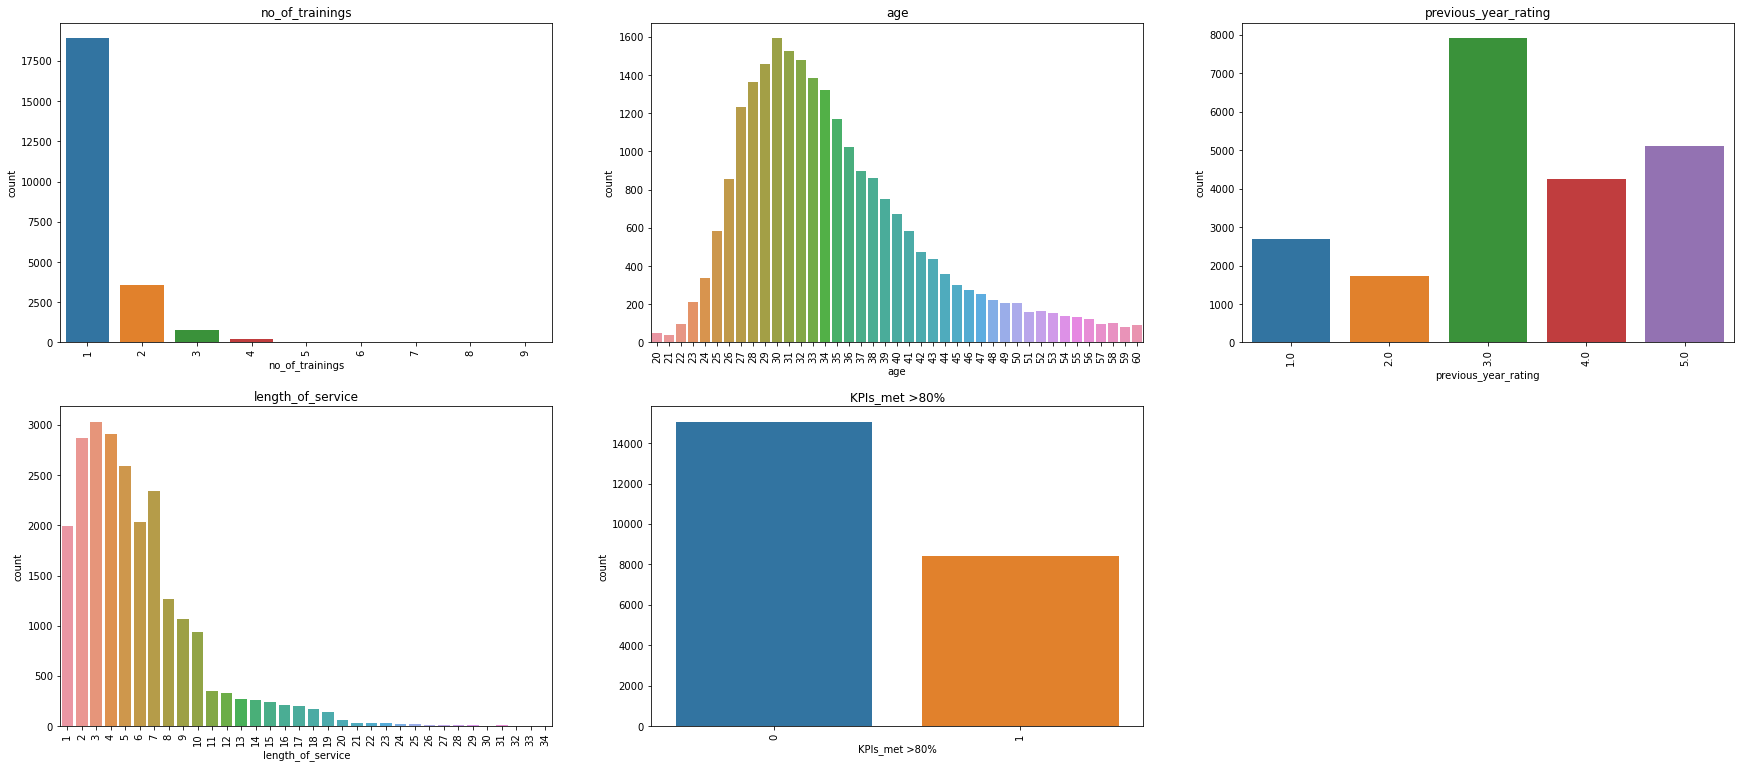

In [144]:
colum = ['no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score']
plt.figure(figsize=(30,20))
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    sns.countplot(data=data,x=data[colum[i]])
    plt.title(colum[i])
    plt.xticks(rotation=90)
plt.show() 

From this we can findout some  insights:
Most of the employees are at the age of 30 with single training.
 Most ofthe employees having 3 years of service
Most of the employees do not have a Key performance indicator value>80% and doesnot won any award
number of employees with previous year rating is high at 3 point like the training data

In [145]:
data['education']=data['education'].fillna("Bachelor's")

In [146]:
data['previous_year_rating']=data['previous_year_rating'].fillna(data['previous_year_rating'].median())

<AxesSubplot:>

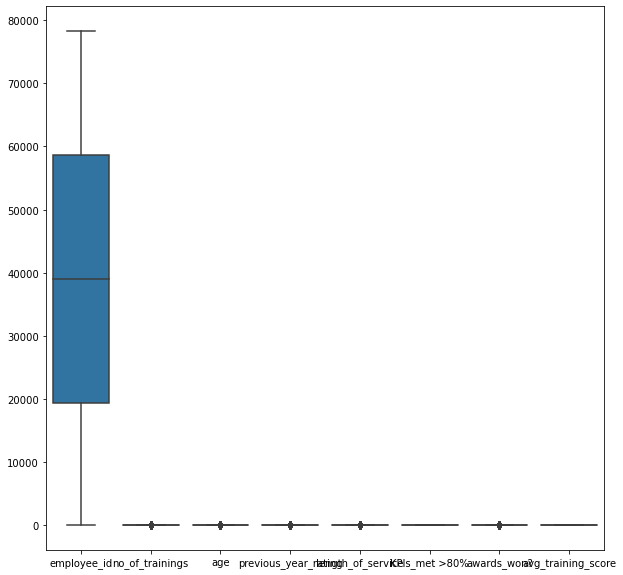

In [147]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data)

In [148]:
# there is no outliers for handling.

In [149]:
data.drop('employee_id',axis=1,inplace=True)

In [150]:
# label encoding
from sklearn.preprocessing import LabelEncoder
labelen=LabelEncoder()
a=['department', 'region', 'education', 'gender',
       'recruitment_channel',]
for i in np.arange(len(a)):
    data[a[i]]=labelen.fit_transform(data[a[i]])

In [151]:
# Standardisation


from sklearn.preprocessing import StandardScaler

std = StandardScaler()
data = std.fit_transform(data)

In [152]:
# we get high accuracy and f1 score in Random forest classifier. so we can use this model to predict the test data

In [153]:
predictions=rf.predict(data)

In [154]:
predictions

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [155]:
test_data=pd.read_csv("test_2umaH9m.csv")

In [156]:
prediction=pd.DataFrame(predictions)

In [163]:
test_data['is_promoted']=prediction

In [164]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,predictions,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,1,1
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0,0


In [167]:
solution=test_data[['employee_id','is_promoted']]

In [168]:
solution.head()

,employee_id,is_promoted
0,8724,1
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [169]:
solution.shape

(23490, 2)

In [170]:
solution.to_csv('submission.csv',index=False)